<a href="https://colab.research.google.com/github/kaitz2981-ux/TTNT/blob/main/Tuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

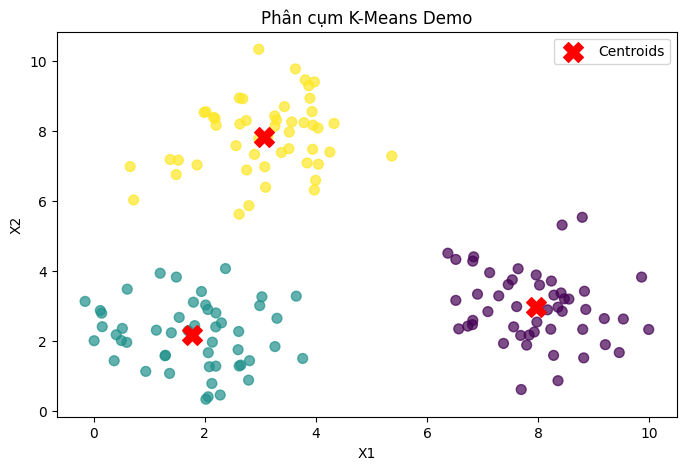

In [1]:
import numpy as np
import random
import math

class KMeans:
    """
    Cài đặt thuật toán K-Means (Phân cụm).
    """
    def __init__(self, k=3, max_iters=100, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.random_state = random_state

    def _euclidean_distance(self, x1, x2):
        """Tính khoảng cách Euclidean giữa hai điểm."""
        return np.sqrt(np.sum((x1 - x2)**2))

    def fit(self, X):
        """Khởi tạo và chạy thuật toán K-Means."""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples = X.shape[0]

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):

            cluster_assignments = self._create_clusters(X)

            old_centroids = self.centroids
            self.centroids = self._update_centroids(X, cluster_assignments)

            if self._is_converged(old_centroids, self.centroids):
                break

        return self.centroids

    def _create_clusters(self, X):
        """Gán mỗi điểm dữ liệu vào centroid gần nhất."""
        cluster_assignments = []
        for sample in X:
            distances = [self._euclidean_distance(sample, centroid) for centroid in self.centroids]
            closest_centroid_index = np.argmin(distances)
            cluster_assignments.append(closest_centroid_index)
        return np.array(cluster_assignments)

    def _update_centroids(self, X, cluster_assignments):
        """Tính toán vị trí mới của các centroids (tâm cụm)."""
        new_centroids = np.zeros((self.k, X.shape[1]))
        for idx in range(self.k):
            points_in_cluster = X[cluster_assignments == idx]
            if len(points_in_cluster) > 0:
                new_centroids[idx] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[idx] = self.centroids[idx]
        return new_centroids

    def _is_converged(self, old_centroids, new_centroids):
        """Kiểm tra xem các centroids có ngừng di chuyển không."""
        distances = [self._euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def predict(self, X):
        """Dự đoán cluster cho các điểm mới hoặc điểm huấn luyện."""
        return self._create_clusters(X)
if __name__ == '__main__':
    X = np.concatenate([
        np.random.normal(loc=[2, 2], scale=1, size=(50, 2)),
        np.random.normal(loc=[8, 3], scale=1, size=(50, 2)),
        np.random.normal(loc=[3, 8], scale=1, size=(50, 2))
    ])

    kmeans = KMeans(k=3, random_state=42)
    kmeans.fit(X)

    clusters = kmeans.predict(X)

    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 5))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
        plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
                    marker='X', s=200, c='red', label='Centroids')
        plt.title("Phân cụm K-Means Demo")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.show()
    except ImportError:
        print("\nCần thư viện Matplotlib để trực quan hóa.")
        print("Centroids cuối cùng:\n", kmeans.centroids)